In [1]:
import cv2
# !pip install retina-face
from retinaface import RetinaFace
import numpy as np

In [2]:
image = cv2.imread('img1.jpg')
resp = RetinaFace.detect_faces(img_path='img1.jpg')
resp

{'face_1': {'score': 0.999502956867218,
  'facial_area': [1645, 1133, 2528, 2210],
  'landmarks': {'right_eye': [1789.3524, 1591.7573],
   'left_eye': [2160.04, 1484.265],
   'nose': [1958.4454, 1754.4894],
   'mouth_right': [1938.2922, 2002.3107],
   'mouth_left': [2212.803, 1915.7262]}}}

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [5]:
face = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=20)


In [6]:
face

array([[1466, 1102, 1079, 1079]], dtype=int32)

In [5]:
import cv2
# !pip install retina-face
from retinaface import RetinaFace
import numpy as np

image = cv2.imread('img2.jpeg')
resp = RetinaFace.detect_faces(img_path='img2.jpeg')

# eyes nose mouth
def face_features(resp):
    for i,(x, y) in resp['face_1']["landmarks"].items():
        print(i,x,y)
        cv2.circle(image, (int(x) , int(y) ), 20, (0, 255, 0), 2)

    x1,y1=resp['face_1']["landmarks"]["left_eye"]
    x,y=resp['face_1']["landmarks"]["right_eye"]
    x=(x1+x)/2
    y=(y+y1)/2

    angle = np.arctan2(y1-y, x1-x) * 180 / np.pi
    print(angle)
    M = cv2.getRotationMatrix2D((x,y), angle, 1.0)
    rotated_img = cv2.warpAffine(image, M, ((image.shape[1], image.shape[0])))
    return rotated_img
    

# face
def face_box(rotated_img,face):
    for (x, y, w, h) in face:
        cv2.rectangle(rotated_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

rotated_img=face_features(resp)

gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=20)

face_box(rotated_img,face)

right_eye 394.55435 183.9273
left_eye 523.45386 180.17027
nose 475.70276 262.62445
mouth_right 412.1848 323.6577
mouth_left 511.26385 319.4119
-1.6695339760385397


In [ ]:
cv2.imshow('img', rotated_img)

def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.destroyAllWindows()

cv2.setMouseCallback('img', mouse_callback)
    
    
cv2.waitKey()
cv2.destroyAllWindows()

# another using mediapipe

In [1]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.8/982.8 kB 23.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 MB 6.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.1 MB/s eta 0:00:00
  Using cached cffi-1.15.1-cp39-cp39-macosx_10_9_x86_64.whl (179 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00:00:010:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Using cached pycparser-2.21-py2.py3-none

In [9]:
import cv2
import mediapipe as mp
import numpy as np

2023-04-30 23:43:37.635668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh # 468 face Landmarks
mp_drawing_styles = mp.solutions.drawing_styles
draw_specs = mp_drawing. DrawingSpec(thickness=1, circle_radius=1)

In [3]:
def get_landmark(image):
    face_mesh=mp_face_mesh.FaceMesh(static_image_mode=True,max_num_faces=1,refine_landmarks=True,min_detection_confidence=0.5)
    image.flags.writeable=False
    result=face_mesh.process(image)
    landmarks=result.multi_face_landmarks[0].landmark
    return result,landmarks
def draw_landmarks(image,result):
    image.flags.writeable=True
    if result.multi_face_landmarks:
        for face_landmark in result.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=face_landmark,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
    return image

In [ ]:
path_img = 'img1.jpg'
img = cv2.imread(path_img)
an_img=img.copy()
# img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result, landmarks = get_landmark(image=img)
annot_img = draw_landmarks(image=an_img,result=result)
# for face in result.multi_face_landmarks:
#     for landmark in face.landmark:
#         print(f'x -> {landmark.x}')
        
cv2.imshow("image",annot_img)


def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.destroyAllWindows()

cv2.setMouseCallback('image', mouse_callback)
    
    
cv2.waitKey()
cv2.destroyAllWindows()



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# face mesh
mp_face_mesh = mp.solutions.face_mesh # 468 face Landmarks
# face_mesh = mp_face_mesh.FaceMesh()
face_mesh=mp_face_mesh.FaceMesh(static_image_mode=True,max_num_faces=1,refine_landmarks=True,min_detection_confidence=0.5)

# face detection
face_detection = mp.solutions.face_detection.FaceDetection()

path_img = 'img2.jpeg'
image = cv2.imread(path_img)

# Detect the face and the landmarks of the eyes
results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



def allign_face(results):
    if results.detections:
        for face_detection in results.detections:
            
            face_landmarks = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).multi_face_landmarks[0]

            # Extract the coordinates of the left and right eye landmarks
            left_eye_left_coords = (int(face_landmarks.landmark[33].x * image.shape[1]),
                               int(face_landmarks.landmark[33].y * image.shape[0]))
            left_eye_right_coords = (int(face_landmarks.landmark[133].x * image.shape[1]),
                                int(face_landmarks.landmark[133].y * image.shape[0]))
            left_eye_coords=((left_eye_left_coords[0]+left_eye_right_coords[0])//2,(left_eye_left_coords[1]+left_eye_right_coords[1])//2)
            
            right_eye_left_coords = (int(face_landmarks.landmark[362].x * image.shape[1]),int(face_landmarks.landmark[362].y * image.shape[0]))
            right_eye_right_coords = (int(face_landmarks.landmark[263].x * image.shape[1]),int(face_landmarks.landmark[263].y * image.shape[0]))
            
            right_eye_coords=((right_eye_left_coords[0]+right_eye_right_coords[0])//2,(right_eye_left_coords[1]+right_eye_right_coords[1])//2)
            
            
            print(f'left eye -> {left_eye_coords}')
            print(f'right eye-> {right_eye_coords}')
            cv2.circle(image, left_eye_coords, 20, (0, 255, 0), 2)
            cv2.circle(image, right_eye_coords, 20, (0, 255, 0), 2)
            

            # Compute the angle of rotation based on the relative position of the eyes
            dy = right_eye_coords[1] - left_eye_coords[1]
            dx = right_eye_coords[0] - left_eye_coords[0]
            angle = np.arctan2(dy, dx) * 180 / np.pi
            print(f'angle -> {angle}')

            # Compute the center point of the eyes
            eyes_center = ((left_eye_coords[0] + right_eye_coords[0]) // 2,
                           (left_eye_coords[1] + right_eye_coords[1]) // 2)

            # Define an affine transformation matrix that will perform the rotation around the center of the eyes
            M = cv2.getRotationMatrix2D(eyes_center, angle, 1)

            # Apply the affine transformation to the image
            aligned_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)
            return aligned_image
        
def face_box(img):
    results = face_detection.process(image)
    for detection in results.detections:
        if detection.score[0] > 0.5:
            bbox = detection.location_data.relative_bounding_box
            x, y, w, h = int(bbox.xmin * image.shape[1]), int(bbox.ymin * image.shape[0]), \
                         int(bbox.width * image.shape[1]), int(bbox.height * image.shape[0])
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

            
def face_box2(rotated_img,face):
    for (x, y, w, h) in face:
        cv2.rectangle(rotated_img, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)
#         cv2.imwrite(f'result/{path_img}', rotated_img[int(y-(h)):int(y+h, int(x-(w)),int(x+w)])
image=allign_face(results)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=20)
print
face_box2(image,face)






# path_img = 'img1.jpg'
# img = cv2.imread(path_img)
# rgb_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# result=face_mesh.process(rgb_image)
# cv2.imshow("image",img)


cv2.imshow("image",image)
cv2.waitKey(0)

2023-05-13 21:46:46.782212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


left eye -> (388, 182)
right eye-> (517, 177)
angle -> -2.2196555531978914


In [1]:


import cv2
# !pip install retina-face
from retinaface import RetinaFace
import cv2
import mediapipe as mp
import numpy as np


path_img = 'img1.jpg'
image = cv2.imread(path_img)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

upperbody_cascade = cv2.CascadeClassifier('haarcascade_mcs_upperbody.xml')
upperbodies = upperbody_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in upperbodies:
    print(x, y, w, h)
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[ERROR:0@11.466] global persistence.cpp:505 open Can't open file: 'haarcascade_mcs_upperbody.xml' in read mode


error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [ ]:
import cv2
img = cv2.imread('img1.jpg')

# Define new size
new_width = 550
new_height = 490


# Compute scale factors for width and height
scale_width = new_width / img.shape[1]
scale_height = new_height / img.shape[0]

# Compute new dimensions with the same aspect ratio
if scale_width < scale_height:
    new_width = int(img.shape[1] * scale_width)
    new_height = int(img.shape[0] * scale_width)
else:
    new_width = int(img.shape[1] * scale_height)
    new_height = int(img.shape[0] * scale_height)


# Resize image using cv2.resize and border reflection
resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
cv2.imshow('Resized image with border reflection', resized_img)
resized_img = cv2.copyMakeBorder(resized_img, 100, 100, 100, 100, cv2.BORDER_REFLECT)

# Display the result
cv2.imshow('Resized image with border reflection', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

# Load image
img = cv2.imread('img1.jpg')

# Define new size
new_width = 600
new_height = 200

# Compute scale factors for width and height
scale_width = new_width / img.shape[1]
scale_height = new_height / img.shape[0]

# Compute new dimensions with the same aspect ratio
if scale_width < scale_height:
    new_width = int(img.shape[1] * scale_width)
    new_height = int(img.shape[0] * scale_width)
else:
    new_width = int(img.shape[1] * scale_height)
    new_height = int(img.shape[0] * scale_height)

# Compute padding
left_pad = max((new_width - img.shape[1]) // 2, 0)
right_pad = max(new_width - img.shape[1] - left_pad, 0)
top_pad = max((new_height - img.shape[0]) // 2, 0)
bottom_pad = max(new_height - img.shape[0] - top_pad, 0)

# Add border with reflection padding
padded_img = cv2.copyMakeBorder(img, top_pad, bottom_pad, left_pad, right_pad, cv2.BORDER_REFLECT)

# Resize padded image using cv2.resize
resized_img = cv2.resize(padded_img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Display the result
cv2.imshow('Resized image with padding and border reflection', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


#  dataset collection

['img2.jpeg', 'img1.jpg']


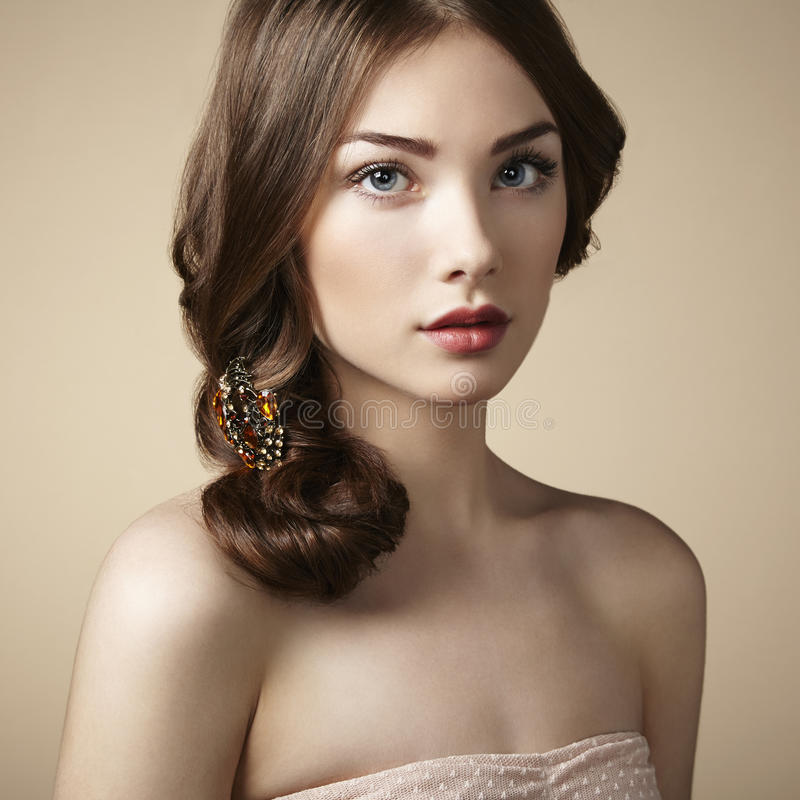

timeout


KeyboardInterrupt: Interrupted by user

In [6]:
from IPython.display import Image, display, clear_output
import os
import time
import signal

def timeout_handler(signum, frame):
    print("timeout")
    raise Exception("Timeout occurred")

image_folder = 'jupyter_dataset/source'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg')]
print(image_files)

# Set the timeout duration in seconds
timeout_duration = 1

# Set the signal handler for SIGALRM
signal.signal(signal.SIGALRM, timeout_handler)
signal.alarm(10)

for f in image_files:
    display(Image(filename=image_folder+'/'+f))
    start_time = time.time()
    try:
        user_input = input("Please enter your input: ")
        print("User input:", user_input)
        signal.alarm(0)
    except TimeoutError:
        print("Timeout occurred. No user input.")
    clear_output()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 450.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 677.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 475.0 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Text(value='', description='Input:')

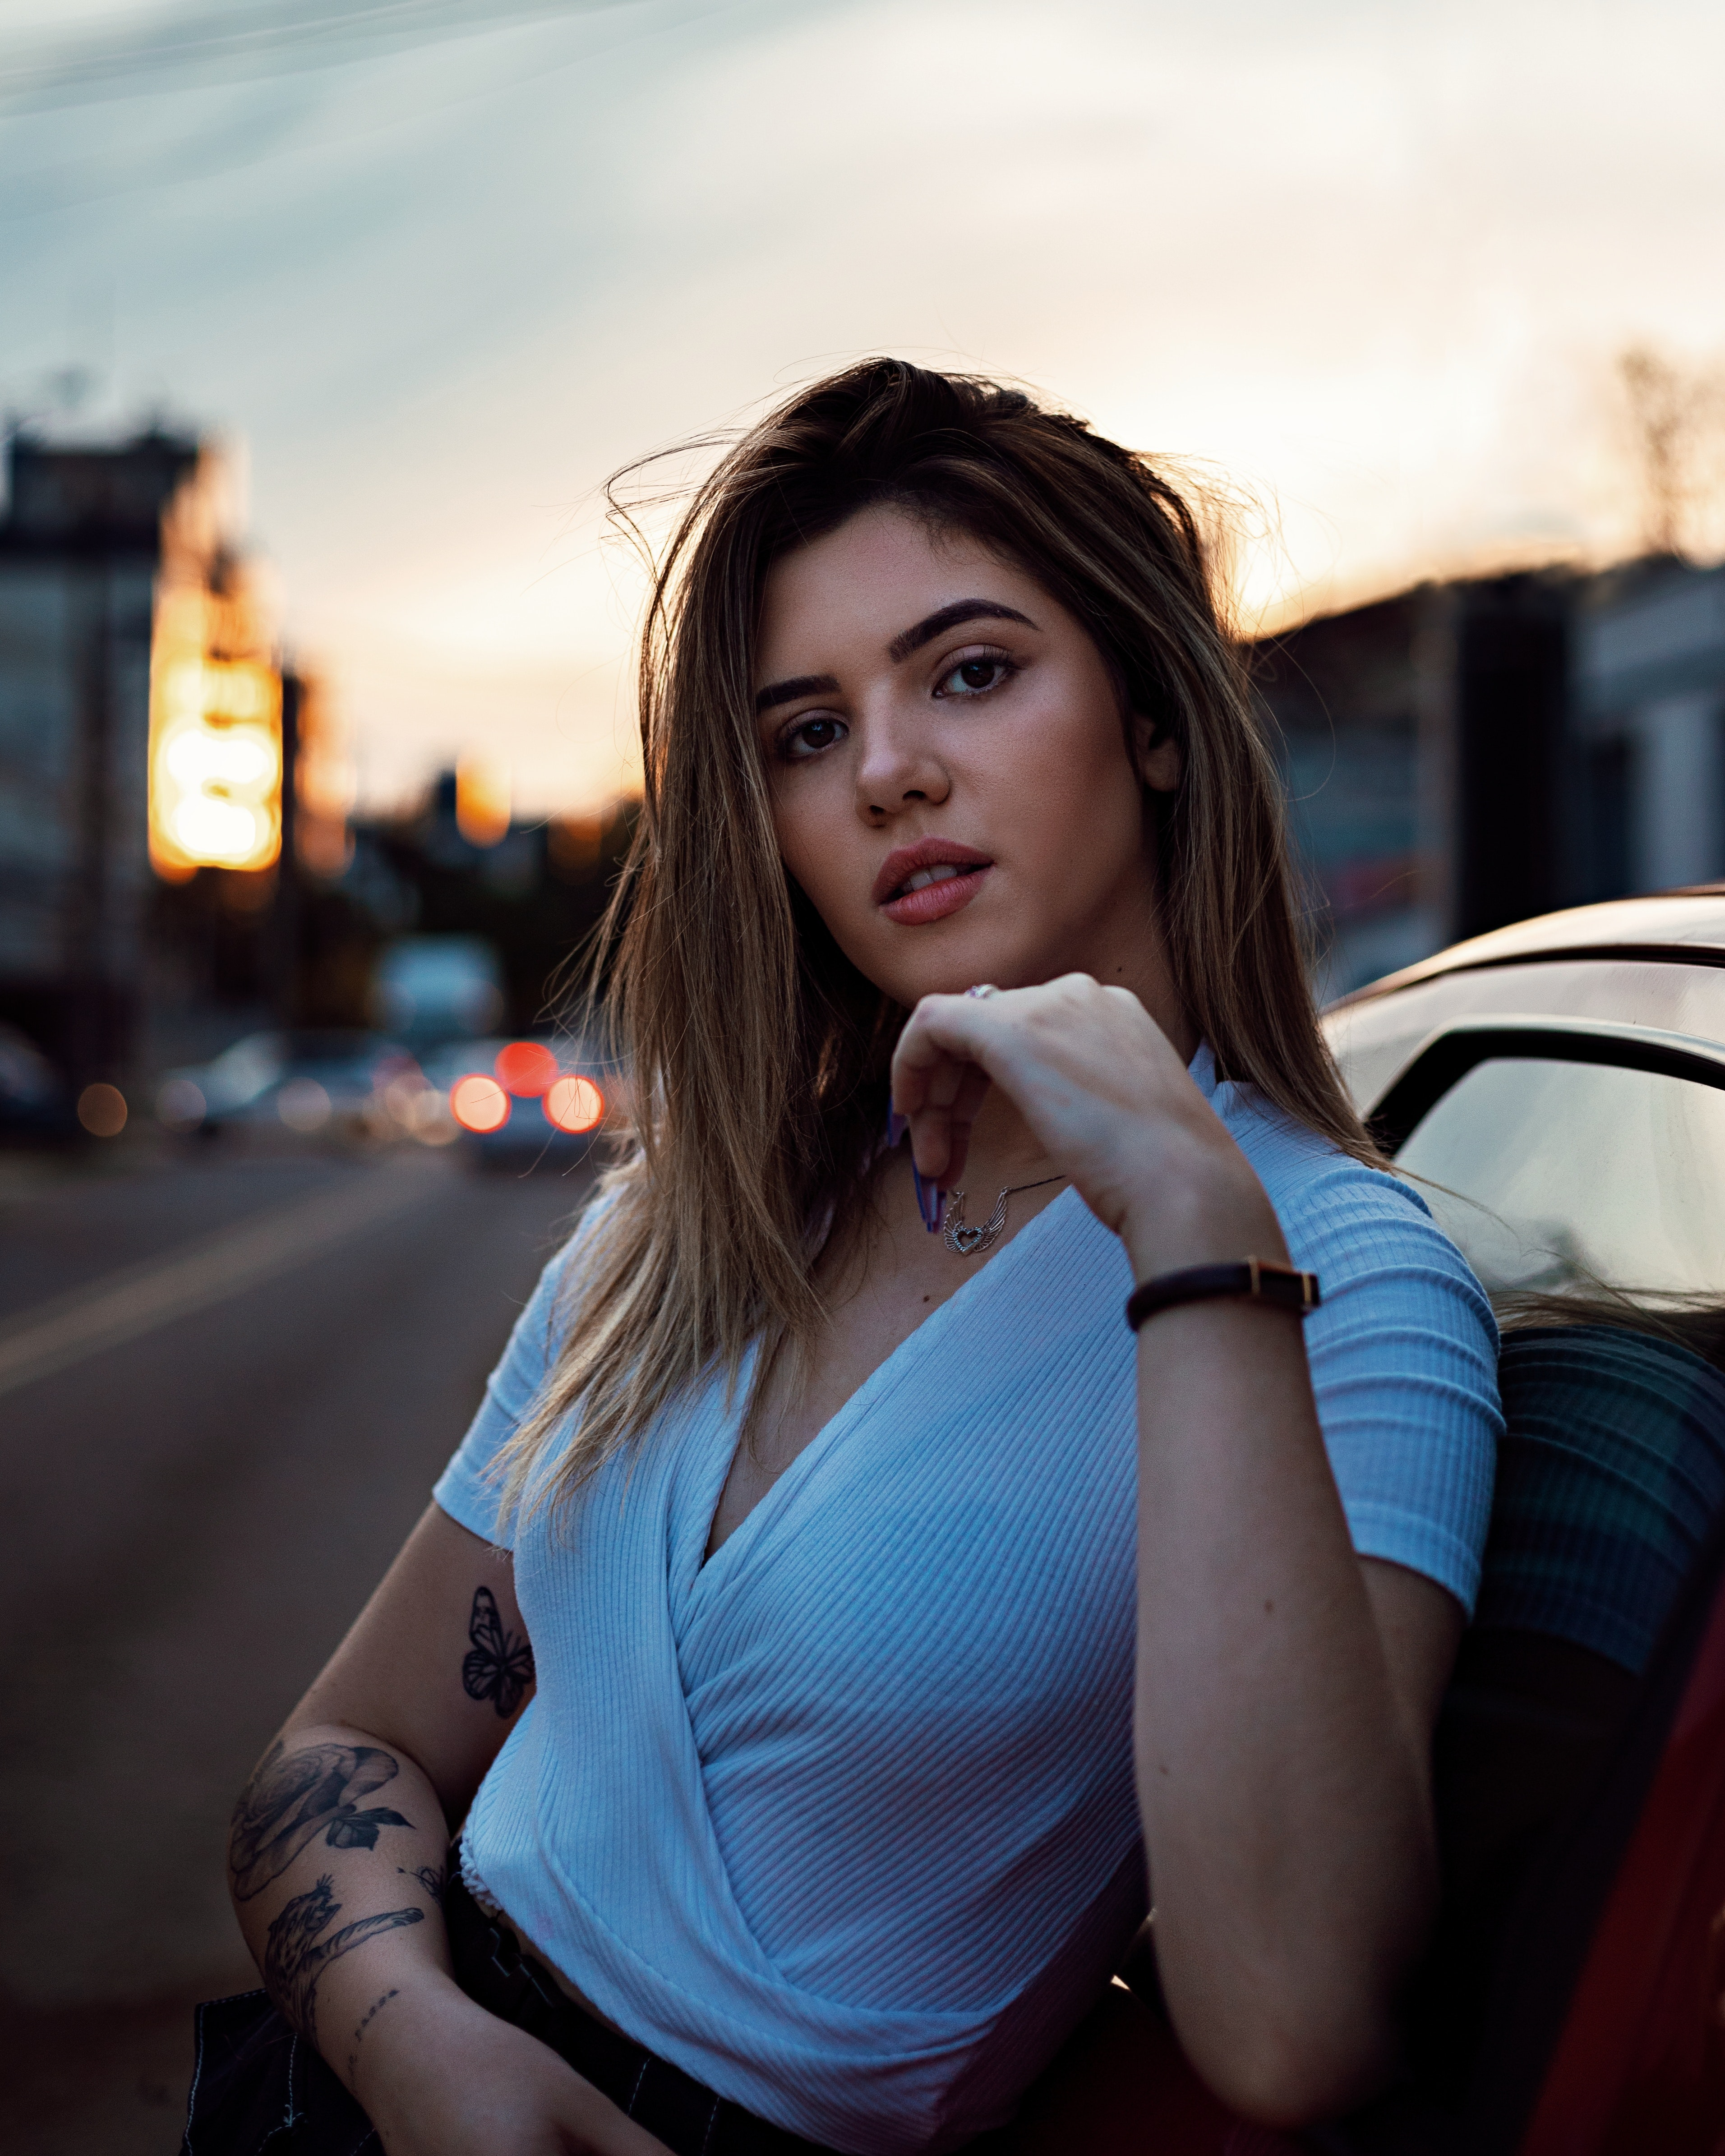

KeyboardInterrupt: 

In [9]:
from IPython.display import Image, display, clear_output
!pip install ipywidgets
import ipywidgets as widgets
import time
import os

# Path to the folder containing the images
image_folder = 'jupyter_dataset/source'

# Get a list of image filenames in the folder
image_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg') or file.endswith('.png')]
num_images = len(image_files)
current_image_index = 0

# Create a text input widget
input_widget = widgets.Text(description='Input:')

# Display the input widget
display(input_widget)

# Display images until a number outside the range 0-10 is entered or 10 seconds have passed
start_time = time.time()
while time.time() - start_time < 10 and current_image_index < num_images:
    # Get the current image path
    current_image_path = os.path.join(image_folder, image_files[current_image_index])
    
    # Display the image
    display(Image(filename=current_image_path))
    
    # Wait for user input
    input_widget.value = ''
    user_input = input_widget.value
    while user_input == '':
        time.sleep(0.1)
        user_input = input_widget.value
    
    # Check if the input is outside the range 0-10
    try:
        number = int(user_input)
        if number < 0 or number > 10:
            break
    except ValueError:
        break
    
    # Clear the output
    clear_output(wait=True)
    
    # Move to the next image
    current_image_index += 1

# Clear the output
clear_output(wait=True)

In [19]:
import pandas as pd
import numpy as np
# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv('csv_file.csv')

dataset.columns
dataset.image

0    [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
1    [[0 0 1 ... 1 1 2]\n [0 0 1 ... 1 1 2]\n [0 0 ...
Name: image, dtype: object

In [20]:
image_data = dataset['image'].dtype

# Convert the image data to a numpy array
# matrix_data = np.array(image_data.tolist())

# # Set print options to display the entire matrix
# np.set_printoptions(threshold=np.inf)

# # Print the entire matrix
print(image_data)

object
